In [18]:
import pandas as pd 


In [19]:
player_data_import = pd.read_csv("/Users/deepjeetdatta/Downloads/players.csv")

In [20]:
player_data_import

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [23]:
player_data_import["height"].apply(lambda x: x.split("-"))

0        [6, 1]
1        [6, 0]
2        [6, 0]
3        [6, 1]
4        [6, 1]
         ...   
2727     [6, 3]
2728     [6, 3]
2729     [5, 9]
2730       [73]
2731    [5, 10]
Name: height, Length: 2732, dtype: object

In [31]:
player_data_import["height_inches"] = player_data_import["height"].apply(lambda x: int(x.split("-")[0])*12 + int(x.split("-")[1]) if len(x.split("-"))== 2 else int(x))

In [32]:
player_data_import

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


Text(0.5, 1.0, 'Central Limit Theorem')

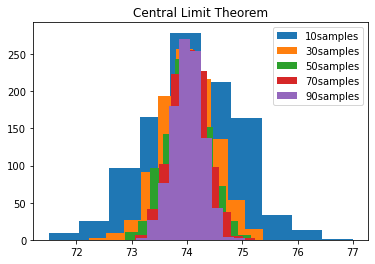

In [36]:
import matplotlib.pyplot as plt

sample_amounts = range(10, 100, 20)

for x in sample_amounts:
    samples = []
    for i in range(1000):
        samples.append(player_data_import["height_inches"].sample(x).mean())
    plt.hist(samples)
plt.legend([str(z) + 'samples' for z in sample_amounts])
plt.title("Central Limit Theorem")


In [38]:
player_data_import["height_inches"].sem()

0.05065243293253027

In [40]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(player_data_import["height_inches"])
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics')
print(f'original: {player_data_import["height_inches"].median()}')
print(f'bias: {results.mean() - player_data_import["height_inches"].median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics
original: 74.0
bias: 0.0
std. error: 0.0


<AxesSubplot:>

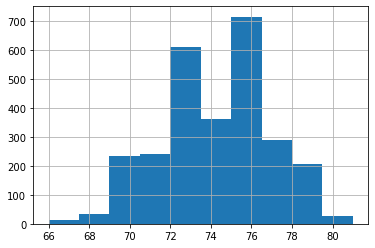

In [41]:
player_data_import["height_inches"].hist()

In [46]:
from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(player_data_import["height_inches"])
    results.append(sample.mean())
results = pd.Series(results)
print('Bootstrap Statistics')
print(f'original: {player_data_import["height_inches"].mean()}')
print(f'bias: {results.mean() - player_data_import["height_inches"].mean()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics
original: 74.0106149341142
bias: -0.0015475841874916796
std. error: 0.051648553949013826


In [50]:
import numpy as np
import scipy.stats as st

data = player_data_import["height_inches"][:20]
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(71.6396036490789, 74.26039635092111)

In [57]:
import numpy as np
import scipy.stats as st
np.random.seed(0)
data = player_data_import["height_inches"].sample(1500)
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))

(73.92590128473445, 74.19009871526556)